# Rappels sur les systèmes d'ordre 2

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti

#### Table des matières

* [Définition](#Définition)
    * [Equation différentielle](#Equation-différentielle)
    * [Fonction de transfert](#Fonction-de-transfert)
* [Réponse Indicielle](#Réponse-Indicielle)
* [Réponse Fréquentielle](#Réponse-Fréquentielle)
   
    
## Définition 

### Equation différentielle

Soit $e(t)$ l'entrée d'un système LTI et $s(t)$ sa sortie. Pour un système passe-bas linéaire d'ordre 2, le lien entre l'entrée et la sortie peut être régit par une équation différentielle de second ordre à coefficients constants.

$$\frac{1}{\omega_n^2}\frac{d^2 s(t)}{dt^2}+\frac{2m}{\omega_n}\frac{d s(t)}{dt}+s(t)=Ke(t)$$

* $K\ge 0$ : gain statique
* $m \ge 0$ : coefficient d'amortissement
* $\omega_n$ : pulsation propre (en rad/s)

### Fonction de transfert

La fonction de transfert d'un système passe-bas de second ordre est donnée par :

$$H(p)=\frac{K}{\frac{1}{\omega_n^2}p^2+\frac{2m}{\omega_n}p+1}$$


#### Cas où $m>1$

Deux pôles réels négatifs :

* $p_{1}=-\omega_n(m-\sqrt{m^2-1})$
* $p_{2}=-\omega_n(m+\sqrt{m^2-1})$
   
Le système peut alors se décomposer en deux systèmes d'ordre 1 de constante de temps respective $\tau_1=-\frac{1}{p_1}$ et $\tau_2=-\frac{1}{p_2}$.

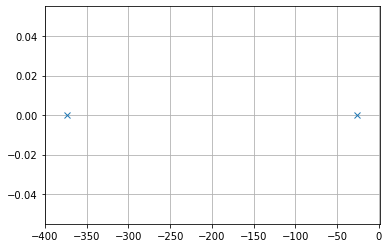

In [78]:
K1, m1, wn1 = 10,2,100
H1 = lti([K1],[1/(wn1**2),2*m1/wn1,1])

plt.plot(np.real(H1.poles),np.imag(H1.poles),'x')
plt.grid()
plt.xlim([-400,1]);

#### Cas où $m=1$ 

Un pôle double :

* $p_1 = p_2 = -m\omega_n$

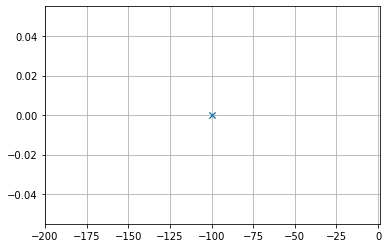

In [79]:
K2, m2, wn2 = 10,1,100
H2 = lti([K2],[1/(wn2**2),2*m2/wn2,1])

plt.plot(np.real(H2.poles),np.imag(H2.poles),'x')
plt.grid()
plt.xlim([-200,1]);

#### Cas où $0\le m<1$ 

Deux pôles complexes-conjugués :

* $p_{1}=-\omega_n(m-j\sqrt{1-m^2})$
* $p_{2}=-\omega_n(m+j\sqrt{1-m^2})$

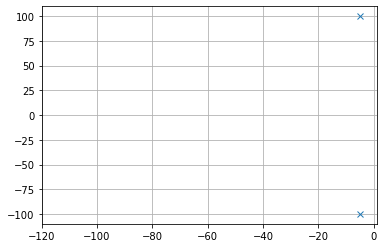

In [80]:
K3, m3, wn3 = 10,0.05,100
H3 = lti([K3],[1/(wn3**2),2*m3/wn3,1])

plt.plot(np.real(H3.poles),np.imag(H3.poles),'x')
plt.grid()
plt.xlim([-120,1]);

## Réponse Indicielle

La réponse indicielle correspond à la réponse du système lorsque l'entrée est un échelon c-a-d 

$$e(t)=Eu(t)=\left\{\begin{array}{cl} E &\text{ si }t\ge 0\\
0&\text{ sinon}\\
\end{array}\right. $$

### Cas où $m>1$


Lorsque $m>1$, les deux pôles sont réels négatifs. Dans ce contexte, la réponse indicielle s'exprime sous la forme

$$s(t)=KE\left(1-\frac{1}{2\omega_n\sqrt{m^2-1}}\left(p_1 e^{p_2 t}-p_2 e^{p_1 t} \right)\right)u(t)$$

#### Propriétés 

* Valeur initiale : $s(0)=0$,
* Valeur finale : $s(\infty)=KE$,
* Temps de réponse à $\pm 5\%$ : Pas de formule simple. Lorsque $m\gg 1$, le temps de réponse est dicté par le pôle le plus lent c-a-d $t_r\approx -\frac{3}{p1}$
* Pas de dépassement : $s(\infty)=\max(s(t))=KE$

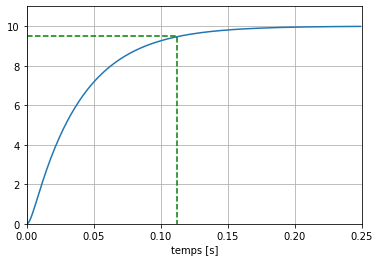

In [81]:
E = 1
t,s = H1.step(T=np.arange(0,0.25,0.001))  #E=1
tr = 3/(-H1.poles[1])

plt.plot(t,s)
plt.plot([0,tr,tr],[0.95*K1*E,0.95*K1*E,0],'g--')
plt.grid()
plt.xlim([0,0.25])
plt.ylim([0,11])
plt.xlabel("temps [s]");

### Cas où $0\le m <1$


Lorsque $0\le m <1$, les deux pôles sont complexes-conjugués. Dans ce contexte, la réponse indicielle s'exprime sous la forme

$$s(t)=KE\left(1-\frac{1}{\sqrt{1-m^2}}e^{-m\omega_nt}\cos\left(\omega_n\sqrt{1-m^2}t-\arcsin(m)\right)\right)u(t)$$

#### Propriétés 

* Valeur initiale : $s(0)=0$,
* Valeur finale : $s(\infty)=KE$,
* Temps de réponse à $\pm 5\%$ : Pas de formule simple, nous utiliserons des abaques. Lorsque $m\to 0$, le temps de réponse est approximativement imposé par l'enveloppe c-a-d $t_r\approx \frac{3}{\omega_n m}$,
* Présence d'oscillations à la pseudo-pulsation (rad/s):

$$\omega_p = \omega_n\sqrt{1-m^2}$$

* Premier Dépassement relatif :

$$D_r(\%)=\frac{\max(s(t))-s(\infty)}{s(\infty)}=e^{\frac{-\pi m}{\sqrt{1-m^2}}}$$

<div class="alert alert-info">
    Pour déterminer rapidement le temps de réponse à partir de $m$ et $\omega_n$ et la valeur du premier dépassement relatif à paritr de $m$, nous utiliserons des <a href="https://vincentchoqueuse.github.io/web_app_2nd_order_performances/index.html">abaques</a>.
</div>

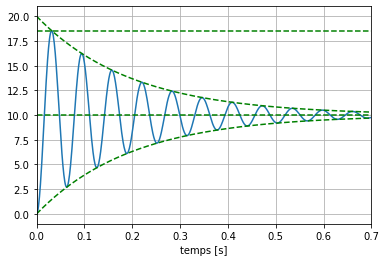

In [82]:
E = 1
t,s = H3.step(T=np.arange(0,0.7,0.001))  #E=1
Dr = np.exp(-np.pi*m3/np.sqrt(1-m3**2))

plt.plot(t,s)
plt.plot(t,K3*E*(1+(1/np.sqrt(1-m3**2))*np.exp(-m3*wn3*t)),'g--')
plt.plot(t,K3*E*(1-(1/np.sqrt(1-m3**2))*np.exp(-m3*wn3*t)),'g--')
plt.plot([0,0.7],[K3*E,K3*E],'g--')
plt.plot([0,0.7],[K3*E*(1+Dr),K3*E*(1+Dr)],'g--')
plt.grid()
plt.xlim([0,0.7])
plt.xlabel("temps [s]");

## Réponse Fréquentielle

La réponse fréquentielle s'obtient en posant $p=j\omega$ où $\omega$ désigne la pulsation (en rad/s). La réponse fréquentielle d'un système passe-bas de premier ordre est donnée par :

$$H(j\omega)=\frac{K}{1-\frac{\omega^2}{\omega_n^2}+j\frac{2m\omega }{\omega_n}}$$

* Comportement à la pulsation propre $\omega_n$ (rad/s) : $H(j\omega_n)=\frac{K}{2jm}$ rad/s.

In [83]:
w,H3jw = H3.freqresp(w=np.logspace(0,4,200))

### Module

Pour $K>0$, le module s'exprime sous la forme

$$|H(j\omega)|=\frac{K}{\sqrt{\left(1-\frac{\omega^2}{\omega_n^2}\right)^2+\frac{4m^2\omega^2}{\omega_n^2}}}$$

* Amplification basse-fréquence : $\lim_{\omega\to 0}|H(j\omega)|=K$,
* Amplification haute-fréquence : $\lim_{\omega\to \infty}|H(j\omega)|=0$.
* Comportement asymptotique : Pour $\omega \gg \omega_n$, $|H(j\omega)|\approx K \left(\frac{\omega_n}{\omega}\right)^2$


#### Résonance:

Si $m<\frac{1}{\sqrt{2}}$, la module présente un extremum à la pulsation de résonance

$$\omega_r = \omega_n \sqrt{1-2m^2}$$

A la pulsation de résonance, le module est égal à $|H(j\omega_r)|=\frac{K}{2m\sqrt{1-m^2}}$. En pratique, nous utiliserons essentiellement le facteur de resonance $M$ qui est égal en valeur naturelle à 

$$M=\frac{|H(j\omega_r)|}{K}=\frac{1}{2m\sqrt{1-m^2}}$$

<div class="alert alert-info">
    Pour déterminer rapidement le facteur de résonance $M_{dB}$ à partir de $m$, nous utiliserons des <a href="https://vincentchoqueuse.github.io/web_app_2nd_order_performances/index.html">abaques</a>.
</div>

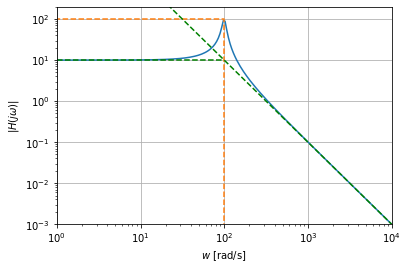

In [84]:
wr = wn3*np.sqrt(1-2*m3**2)
plt.loglog(w,np.abs(H3jw))
plt.plot([0,wr,wr],[K3/(2*m3*np.sqrt(1-m3**2)),K3/(2*m3*np.sqrt(1-m3**2)),0],'--')
plt.plot([1,100],[K3,K3],'g--')
plt.plot([1,10000],[K3*(wn3/1)**2,K3*(wn3/10000)**2],'g--')
plt.grid()
plt.ylim([0.001,200])
plt.xlim([1,10000])
plt.xlabel("$w$ [rad/s]")
plt.ylabel("$|H(j\omega)|$");